<a href="https://colab.research.google.com/github/lmbd92/st1800-st1801-trabajo3-2261/blob/main/Trabajo3Lina_Jose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes: Lina Beltrán (lbeltra1@eafit.edu.co), Jose Muñoz (jjmunozm@eafit.edu.co)

Materia: Alm. & Recu. de información.

Trabajo 3

Universidad EAFIT - Maestria ciencia en datos y analítica

Trabajo 2 Unidad 2 recuperación de texto

Data: https://github.com/lmbd92/st1800-st1801-trabajo3-2261/blob/main/Trabajo3/twitter.txt

# Abrir archivos desde GitHub

In [1]:
# OJO!!!! Ejecutar este bloque una sola vez (Por cada sesión iniciada)

!git clone -l -s https://github.com/lmbd92/st1800-st1801-trabajo3-2261.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 102 (delta 58), reused 17 (delta 5), pack-reused 0
Receiving objects: 100% (102/102), 30.63 MiB | 14.39 MiB/s, done.
Resolving deltas: 100% (58/58), done.
/content/cloned-repo
LICENSE    Trabajo3		    twitterClimateData.csv.zip
README.md  Trabajo3Lina_Jose.ipynb


In [2]:
# Delete repo local colab (Usar solo en caso de requerir actualizar el repo desde Github Nuevamente)

#!rm -r /content/cloned-repo

**Nota:** Para guardar el notebook directamente en Github, dirigirse a File→Save a copy in GitHub

# Preparación de ambiente de trabajo (Dependencias/librerias)

In [3]:
# Transmisión eficiente de archivos muy grandes desde/hacia almacenamientos como S3, GCS, Azure Blob Storage, HDFS, WebHDFS
!pip install smart-open

# Modelado y procesamiento NLP
!pip install --upgrade gensim
!pip install nltk

# Interpretar el tema en un modelo de temas que se ha ajustado a un corpus
!pip install pyLDAvis

     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 1.7 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d89cb1d9d3951532c61430f6c6e7933a0be414f3ab21d4bea669aa13809567f7
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [4]:
import pandas as pd
import numpy as np
import nltk
import matplotlib as plt
# Soporte para expresiones regulares (RE).
import re

In [5]:
# nltk: tokenizador y stopwords

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words_nltk = set(stopwords.words('english'))
print(len(stopwords.words('english')))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
179


In [6]:
#Lematizar, Stem
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
#
lancaster = LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

In [7]:
#imprimir listas grandes
import pprint
from pprint import pprint

# Carga de Data Raw y EDA básico



In [8]:
# Carga de los datos

path_in = '/content/cloned-repo/Trabajo3/'
path_out = '/content/cloned-repo/Trabajo3/out/'
file_name = 'twitterClimateData.csv'

df = pd.read_csv(f'{path_in}{file_name}')
df.head()

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,...,location,text_clean,tb_sentiment_polarity,tb_sentiment_subjectivity,textBlob_sentiment,vader_compound,vader_pos,vader_neg,vader_neu,V_Sentiment
0,0,1.211810e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,...,"California, USA",2020 is the year we votethemout the year we cl...,-0.100000,0.462500,negative,-0.5682,0.000,0.131,0.869,Negative
1,1,1.210670e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,...,"California, USA",Winter has not stopped this group of dedicated...,0.000000,0.000000,positive,0.5670,0.215,0.000,0.785,Positive
2,2,1.210590e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,...,"California, USA",WEEK 55 of ClimateStrike at the UN Next week F...,0.166667,0.333333,positive,-0.8567,0.023,0.180,0.797,Negative
3,3,1.210260e+18,1.339821e+09,"A year of resistance, as youth protests shape...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,...,"California, USA",A year of resistance as youth protests shaped...,0.183333,0.600000,positive,0.7739,0.203,0.051,0.746,Positive
4,4,1.209640e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,...,"California, USA",HAPPY HOLIDAYS greta gretathunberg climatecha...,0.650000,0.800000,positive,0.9413,0.451,0.000,0.549,Positive


In [9]:
df.shape

(72405, 24)

In [10]:
df.count()

Unnamed: 0                   72405
id                           72405
author_id                    72405
text                         72405
retweets                     72405
permalink                    72405
date                         72405
formatted_date               72405
favorites                    72405
mentions                     27554
hashtags                     72402
geo                              0
urls                         33349
search_hashtags              72405
location                     72405
text_clean                   72405
tb_sentiment_polarity        72405
tb_sentiment_subjectivity    72405
textBlob_sentiment           72405
vader_compound               72405
vader_pos                    72405
vader_neg                    72405
vader_neu                    72405
V_Sentiment                  72405
dtype: int64

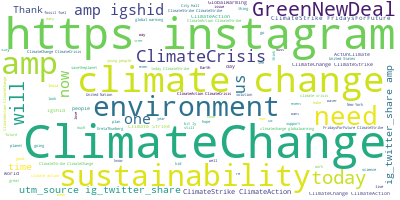

In [11]:
# Importar wordcloud Libreria
from wordcloud import WordCloud
# Unir palabras y caracteres Raw
long_string = ','.join(list(df['text'].values))
# Crear objeto de nube de palabras
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generar nube de palabras
wordcloud.generate(long_string)
# Visualización
wordcloud.to_image()

# Preparación de data, Nubes de tokens y Frecuencia

Definimos funcion para optimizar incluyendo stem y Lematización

In [12]:
def textprep(line):
    tokens = nltk.word_tokenize(str(line))
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [w for w in tokens if w not in stop_words_nltk] 
    tokens= [wordnet_lemmatizer.lemmatize(w) for w in tokens]
    tokens= [lancaster.stem(w) for w in tokens]
    return tokens

In [13]:
#Filtramos solo la columna de interés
text_df = df[['text']]
text_df.head()

,text
0,"2020 is the year we #votethemout, the year we ..."
1,Winter has not stopped this group of dedicated...
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...
3,"A year of resistance, as youth protests shape..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...


In [14]:
# creación de columna con tokenización de la columna de interés especifica
text_df['tokens_twitter'] = text_df.apply(lambda row: textprep(row['text']), axis=1)
text_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,tokens_twitter
0,"2020 is the year we #votethemout, the year we ...","[2020, year, votethemout, year, climatestrik, ..."
1,Winter has not stopped this group of dedicated...,"[wint, stop, group, ded, clim, act, exampl, fo..."
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[week, 55, climatestrik, un, next, week, frida..."
3,"A year of resistance, as youth protests shape...","[year, resist, you, protest, shap, clim, chang..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[happy, holiday, gret, gretathunberg, climatec..."


Representación Frecuencia Visual del BoW optimizado

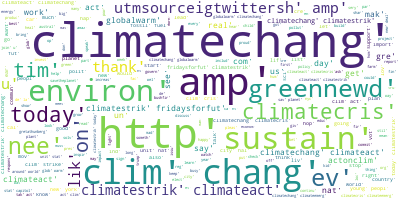

In [15]:
#Convertir Tokens en Lista y Str
tokens_twitter_list=text_df['tokens_twitter'].to_list()
tokens_twitter_str=" ".join([str(item) for item in tokens_twitter_list])
# Crear nube de palabras
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generar nube de palabras
wordcloud.generate(tokens_twitter_str)
# Visualización
wordcloud.to_image()

# Características y representación

Construir el BoW (diccionario) de términos

In [16]:
# Creación del BoW - en gensim es Dictionary
from gensim.corpora import Dictionary
dictionary = Dictionary(text_df.tokens_twitter)
print(dictionary)

Dictionary(77295 unique tokens: ['2020', '33', 'climatestrik', 'don', 'els']...)


In [17]:
# Bag-of-words representacion de documentos.
corpus = [dictionary.doc2bow(line) for line in text_df.tokens_twitter]

In [18]:
for i in corpus[:10]:
    print(i)

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 4)]
[(2, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]
[(0, 1), (2, 1), (6, 1), (15, 1), (16, 1), (17, 1), (24, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2)]
[(0, 1), (2, 1), (15, 1), (16, 1), (17, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2)]
[(2, 1), (17, 1), (49, 1), (51, 1), (52, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (63, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)]
[(2, 1), (17, 2), (36, 1), (50, 1), (52, 1), (54, 1), (56, 1), (57, 1), (78, 1), (79,

Construir matriz de documentos vs términos

In [19]:
# libreria para paralelizar
import multiprocessing as mp
import time

pool = mp.Pool(mp.cpu_count())
doc_term_matrix = pool.map(dictionary.doc2bow, [sentence for sentence in text_df.tokens_twitter])
pool.close()

In [20]:
for i in doc_term_matrix[:10]:
    print(i)

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 4)]
[(2, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]
[(0, 1), (2, 1), (6, 1), (15, 1), (16, 1), (17, 1), (24, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2)]
[(0, 1), (2, 1), (15, 1), (16, 1), (17, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2)]
[(2, 1), (17, 1), (49, 1), (51, 1), (52, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (63, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)]
[(2, 1), (17, 2), (36, 1), (50, 1), (52, 1), (54, 1), (56, 1), (57, 1), (78, 1), (79,

# Modelo no supervisado LDA

Modelo LDA

In [21]:
#from gensim.models.ldamulticore import LdaMulticore

#t0 = time.time()
#lda_model = LdaMulticore(doc_term_matrix, num_topics=20, id2word = dictionary, passes=10, workers=10)
#print(time.time()-t0)

In [22]:
# Build LDA model Otro modelo lda, tiene otro nombr para no confundirse
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models, similarities
from gensim.models import CoherenceModel


Corremos el modelo LDA para valores entre 15 y 20, se evalua y se escoge el correspondiente al accuracy más alto. Para esto se ha utilizado la métrica "Coherence"

In [23]:
for i in range(15,20):
  lda_model2 = models.LdaModel(corpus=corpus,id2word=dictionary,num_topics=i, passes=5, alpha='auto')

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model2, texts=text_df['tokens_twitter'], dictionary=dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('Coherence Score :', coherence_lda)


Coherence Score : 0.4377160621632605
Coherence Score : 0.3737651155249152
Coherence Score : 0.33673595067206596
Coherence Score : 0.3587837881465699
Coherence Score : 0.37000285707383584


El mejor modelo se optiene con un número de Topics **igual a 15**

A continuación, se presenta una gráfica que muestra el Score de la métrica Coherence Vs. la cantidad K de tópicos. Este análisis se hizo en el siguiente artículo de Web: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#12buildingthetopicmodel

![picture](https://drive.google.com/uc?export=view&id=11sf_j3B_e9rpuHSrYTEYw2eEyw90-dip)

Podríamos definir una función para nuestro caso y realizar una gráfica similar, pero para efectos académicos y de reducción de recursos computacionales y tiempo, consideraremos el análisis anterior hecho con el ciclo For para valores de K entre 15 y 20 y la gráfica anterior

Con K = 15 y vecinos a 15 se obtienen resultados considerables buenos para el Accuracy del modelo, así que en este caso hemos decidido trabajar con **15 Topics**

In [ ]:
lda_model2 = models.LdaModel(corpus=corpus,id2word=dictionary,num_topics=15, passes=5, alpha='auto')

In [30]:
def assigntopic(doc):
    vector = lda_model2[dictionary.doc2bow(doc)] 
    # opción 1: todos los tópicos ordenados de mayor a menor, podria ser topN tambien asi: return vector[:5] n=5
    #vector = sorted(vector, key=lambda item: -item[1])
    # opción 2: asignar el tópico mayor a cada documento
    vector = max(vector,key=lambda item: item[1])
    return vector

In [31]:
text_df['topics'] = text_df.apply(lambda row: assigntopic(row['tokens_twitter']), axis=1)
text_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,tokens_twitter,topics
0,"2020 is the year we #votethemout, the year we ...","[2020, year, votethemout, year, climatestrik, ...","(1, 0.37541002)"
1,Winter has not stopped this group of dedicated...,"[wint, stop, group, ded, clim, act, exampl, fo...","(0, 0.32439062)"
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[week, 55, climatestrik, un, next, week, frida...","(1, 0.35908782)"
3,"A year of resistance, as youth protests shape...","[year, resist, you, protest, shap, clim, chang...","(0, 0.40765664)"
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[happy, holiday, gret, gretathunberg, climatec...","(0, 0.49991876)"
5,10 Questions to Ask Politicians About Climate...,"[10, quest, ask, polit, clim, chang, http, www...","(0, 0.5322866)"
6,#climatestrike #FridaysForFuture #portraits #u...,"[climatestrik, fridaysforfut, portrait, unique...","(0, 0.2746861)"
7,#ClimateChangeIsReal #ClimateStrike #ClimateAc...,"[climatechangeisr, climatestrik, climateaction...","(0, 0.43387914)"
8,My oldest daughter finding inspiration and enc...,"[oldest, daught, find, inspir, enco, fut, read...","(0, 0.2528625)"
9,Our toddler #POTUS whined this week about #Tim...,"[toddl, pot, whin, week, tim, magazin, pick, g...","(6, 0.32834852)"


Convertimos la columna de Topics en una Lista

In [32]:
topic_list = text_df['topics'].to_list()
print(topic_list)

[(1, 0.37541002), (0, 0.32439062), (1, 0.35908782), (0, 0.40765664), (0, 0.49991876), (0, 0.5322866), (0, 0.2746861), (0, 0.43387914), (0, 0.2528625), (6, 0.32834852), (0, 0.292659), (13, 0.31464896), (0, 0.4764172), (1, 0.3258456), (0, 0.44604614), (0, 0.24738634), (0, 0.29226166), (0, 0.33147115), (14, 0.31796336), (0, 0.3788604), (14, 0.24253745), (1, 0.48522505), (0, 0.33555934), (0, 0.4009396), (1, 0.23041643), (1, 0.23599066), (1, 0.4165711), (14, 0.27792835), (14, 0.30413482), (1, 0.24681956), (14, 0.28945437), (14, 0.23858835), (14, 0.24643908), (14, 0.45699552), (0, 0.22458489), (14, 0.3213658), (14, 0.24309579), (0, 0.31281677), (14, 0.25213495), (14, 0.30310082), (14, 0.42283204), (14, 0.3073554), (1, 0.4726295), (0, 0.4294584), (1, 0.22833633), (0, 0.30696452), (0, 0.61139226), (0, 0.5783419), (8, 0.56315553), (14, 0.2665632), (14, 0.26478907), (14, 0.285991), (0, 0.24596259), (2, 0.29453805), (1, 0.24358982), (0, 0.40712145), (0, 0.6315843), (14, 0.34456798), (0, 0.3466076

Con esto queremos obtener solamente el ID del Topic con mayor probabilidad para cada Documento

In [33]:
topic_id = [i[0] for i in topic_list]
print(topic_id)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 6, 0, 13, 0, 1, 0, 0, 0, 0, 14, 0, 14, 1, 0, 0, 1, 1, 1, 14, 14, 1, 14, 14, 14, 14, 0, 14, 14, 0, 14, 14, 14, 14, 1, 0, 1, 0, 0, 0, 8, 14, 14, 14, 0, 2, 1, 0, 0, 14, 0, 13, 13, 0, 0, 0, 0, 12, 8, 0, 0, 0, 0, 0, 1, 0, 14, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 0, 14, 1, 0, 14, 0, 0, 0, 0, 0, 14, 0, 1, 14, 0, 14, 0, 14, 0, 14, 0, 0, 0, 0, 12, 0, 0, 0, 14, 0, 0, 14, 11, 0, 0, 2, 0, 0, 0, 0, 0, 0, 14, 1, 14, 0, 0, 1, 2, 14, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 14, 11, 0, 0, 0, 14, 1, 0, 0, 0, 14, 3, 0, 14, 11, 0, 0, 0, 13, 1, 0, 14, 0, 0, 0, 1, 0, 0, 14, 14, 1, 14, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 14, 12, 0, 14, 14, 0, 0, 0, 14, 0, 0, 0, 12, 9, 0, 0, 0, 1, 14, 0, 0, 0, 14, 1, 1, 0, 0, 0, 0, 1, 14, 1, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 14, 0, 14, 14, 0, 1, 0, 14, 0, 14, 1, 0, 1, 9, 14, 1, 1, 14, 0, 0, 0, 14, 1, 0, 8, 0, 0, 14, 14, 0, 1, 14, 1, 1, 1, 0, 0, 12, 0, 0, 1, 14, 0, 14, 14, 14, 14, 14, 14, 0, 0, 1, 0, 0, 0, 0, 1, 14, 14

In [34]:
text_df['topic_id'] = topic_id
text_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,tokens_twitter,topics,topic_id
0,"2020 is the year we #votethemout, the year we ...","[2020, year, votethemout, year, climatestrik, ...","(1, 0.37541002)",1
1,Winter has not stopped this group of dedicated...,"[wint, stop, group, ded, clim, act, exampl, fo...","(0, 0.32439062)",0
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[week, 55, climatestrik, un, next, week, frida...","(1, 0.35908782)",1
3,"A year of resistance, as youth protests shape...","[year, resist, you, protest, shap, clim, chang...","(0, 0.40765664)",0
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[happy, holiday, gret, gretathunberg, climatec...","(0, 0.49991876)",0
5,10 Questions to Ask Politicians About Climate...,"[10, quest, ask, polit, clim, chang, http, www...","(0, 0.5322866)",0
6,#climatestrike #FridaysForFuture #portraits #u...,"[climatestrik, fridaysforfut, portrait, unique...","(0, 0.2746861)",0
7,#ClimateChangeIsReal #ClimateStrike #ClimateAc...,"[climatechangeisr, climatestrik, climateaction...","(0, 0.43387914)",0
8,My oldest daughter finding inspiration and enc...,"[oldest, daught, find, inspir, enco, fut, read...","(0, 0.2528625)",0
9,Our toddler #POTUS whined this week about #Tim...,"[toddl, pot, whin, week, tim, magazin, pick, g...","(6, 0.32834852)",6



Creamos un nuevo DF con las columnas de interés para la aplicación del NAIVE BAYES. En este caso se escoge la columna del BoW Tokenizado Optimizado y la columna de los Topics más relevantes de cada Doc

In [35]:
tokens_topics_df= text_df[['tokens_twitter','topic_id']]
tokens_topics_df.head(10)

,tokens_twitter,topic_id
0,"[2020, year, votethemout, year, climatestrik, ...",1
1,"[wint, stop, group, ded, clim, act, exampl, fo...",0
2,"[week, 55, climatestrik, un, next, week, frida...",1
3,"[year, resist, you, protest, shap, clim, chang...",0
4,"[happy, holiday, gret, gretathunberg, climatec...",0
5,"[10, quest, ask, polit, clim, chang, http, www...",0
6,"[climatestrik, fridaysforfut, portrait, unique...",0
7,"[climatechangeisr, climatestrik, climateaction...",0
8,"[oldest, daught, find, inspir, enco, fut, read...",0
9,"[toddl, pot, whin, week, tim, magazin, pick, g...",6


In [36]:
# Imprimir Keyword en los topics
pprint(lda_model2.print_topics())
doc_lda = lda_model2[corpus]


[(0,
  '0.109*"climatechang" + 0.068*"http" + 0.049*"climatestrik" + 0.046*"clim" + '
  '0.043*"climateact" + 0.038*"climatecris" + 0.028*"chang" + '
  '0.026*"globalwarm" + 0.025*"savetheplanet" + 0.022*"fridaysforfut"'),
 (1,
  '0.071*"sustain" + 0.044*"amp" + 0.032*"environ" + 0.024*"greennewd" + '
  '0.015*"thank" + 0.015*"new" + 0.014*"nee" + 0.014*"day" + 0.013*"get" + '
  '0.013*"gre"'),
 (2,
  '0.054*"via" + 0.048*"trump" + 0.028*"fre" + 0.027*"realdonaldtrump" + '
  '0.026*"americ" + 0.023*"est" + 0.023*"study" + 0.022*"feel" + 0.020*"rest" '
  '+ 0.019*"provid"'),
 (3,
  '0.097*"utmsourceigtwittersh" + 0.032*"wast" + 0.027*"ign" + 0.025*"conserv" '
  '+ 0.024*"weath" + 0.022*"modern" + 0.022*"gard" + 0.021*"saf" + '
  '0.021*"stay" + 0.020*"break"'),
 (4,
  '0.096*"stat" + 0.078*"dc" + 0.071*"capitol" + 0.069*"auspol" + 0.048*"unit" '
  '+ 0.035*"washington" + 0.032*"renew" + 0.025*"min" + 0.023*"sol" + '
  '0.022*"100"'),
 (5,
  '0.558*"" + 0.067*"le" + 0.024*"et" + 0.013*"v

In [37]:

len(lda_model2.print_topics())

15

Analizando Resultados del LDA 

In [39]:
#from pyLDAvis 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [40]:
# Visualize the topics
pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join(')
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model2, corpus, dictionary)
    with open("/content/cloned-repo/Trabajo3/out", 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open("/content/cloned-repo/Trabajo3/out", 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/cloned-repo/Trabajo3/out.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.334667  0.151202       1        1  25.506075
1      0.302086 -0.183700       2        1  23.466869
14     0.275721  0.172957       3        1  14.433867
12     0.068390 -0.291276       4        1   6.005065
11    -0.050302  0.039640       5        1   5.219943
13    -0.027963 -0.048781       6        1   3.689511
7     -0.056329 -0.041479       7        1   3.450753
6     -0.083660  0.051535       8        1   3.230956
10    -0.071902 -0.068795       9        1   3.227424
5     -0.107472  0.052574      10        1   2.656800
4     -0.100751  0.053512      11        1   2.207945
3     -0.103032  0.006779      12        1   2.001593
9     -0.128051  0.042520      13        1   1.755859
2     -0.130364  0.039669      14        1   1.731804
8     -0.121039  0.023644      15        1   1.415536, topic_info=              Term          Freq         Total Category  logprob  loglift
126                 17058.000000  17058.000000  Default  30.0000  30.0000
52    climatechang  33027.000000  33027.000000  Default  29.0000  29.0000
88         sustain  19356.000000  19356.000000  Default  28.0000  28.0000
57            http  21521.000000  21521.000000  Default  27.0000  27.0000
2     climatestrik  22052.000000  22052.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
564          refus    130.682159    131.829429  Topic15  -4.8260   4.2489
3124           tip    122.838893    123.986163  Topic15  -4.8879   4.2484
566          trust    118.740033    119.887303  Topic15  -4.9218   4.2480
2042        terrac    110.671170    111.818442  Topic15  -4.9922   4.2473
334         invest    147.151762   1027.026616  Topic15  -4.7073   2.3147

[613 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
126      10  0.999930                    
580       3  0.001780                 100
580       5  0.003561                 100
580      11  0.991633                 100
1189     12  0.996841                  12
...     ...       ...                 ...
66        3  0.999441                 you
210       3  0.999538               young
1495     10  0.994766  youtubeehg2h9ryplq
3106      6  0.995003                zero
90        8  0.998698            zerowast

[845 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 15, 13, 12, 14, 8, 7, 11, 6, 5, 4, 10, 3, 9])

Guardar Topics

In [41]:
lda_model2.save('Lda_Model')

# Clasificación y análisis de sentimientos

# REFERENCIAS 

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0